In [4]:
#Sentiment Analizi (Duygu Analizi), Emotion Recognition (Duygu Tanıma)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [7]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train[1])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [8]:
print(X_train.shape)

(25000,)


In [9]:
print(X_test.shape)

(25000,)


In [10]:
max_kelime = 500

X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [12]:
print("Eğitim kümesinin boyutları: ", X_train.shape)

Eğitim kümesinin boyutları:  (25000, 500)


In [13]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))

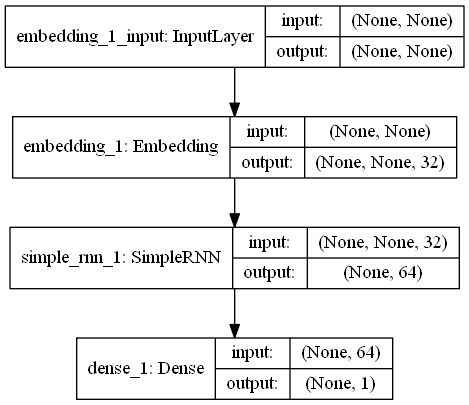

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli_0502.png", show_shapes = True, show_layer_names = True)

In [16]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6861 - accuracy: 0.5486 - val_loss: 0.6581 - val_accuracy: 0.6622
Epoch 2/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.6035 - accuracy: 0.7164 - val_loss: 0.5228 - val_accuracy: 0.7534
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4236 - accuracy: 0.8136 - val_loss: 0.4037 - val_accuracy: 0.8196
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3091 - accuracy: 0.8725 - val_loss: 0.3636 - val_accuracy: 0.8428
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2346 - accuracy: 0.9114 - val_loss: 0.4194 - val_accuracy: 0.8054
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1976 - accuracy: 0.9273 - val_loss: 0.4053 - val_accuracy: 0.8474
Epoch 7/10
20000/20000 [==============================] - 37s 2ms/st

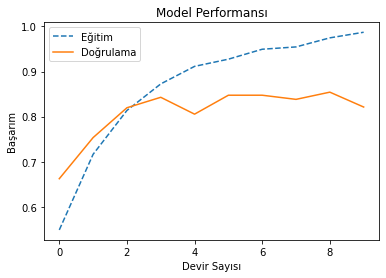

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

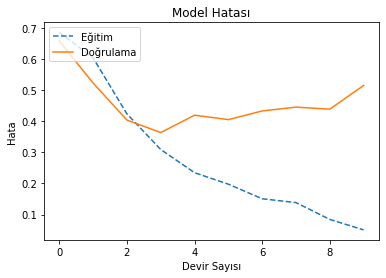

In [19]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [20]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin doğruluğu: %.2f%%" % (performans[1] * 100))

Modelin doğruluğu: 82.81%


In [21]:
#LSTM
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [22]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train[1])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [23]:
max_kelime = 500

X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [24]:
print("Eğitim kümesinin boyutları: ", X_train.shape)

Eğitim kümesinin boyutları:  (25000, 500)


In [25]:
#Model Mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

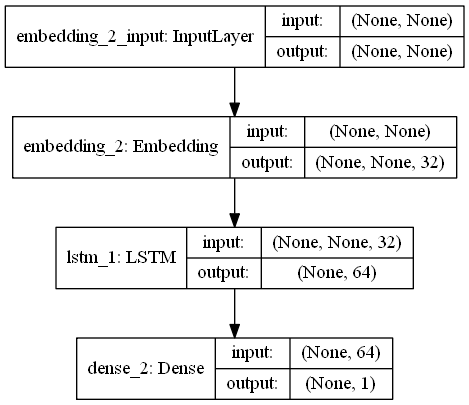

In [26]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli_0502.png", show_shapes = True, show_layer_names = True)

In [27]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [28]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 224s 11ms/step - loss: 0.6588 - accuracy: 0.6194 - val_loss: 0.5418 - val_accuracy: 0.7930
Epoch 2/10
20000/20000 [==============================] - 224s 11ms/step - loss: 0.5173 - accuracy: 0.7893 - val_loss: 0.4733 - val_accuracy: 0.7822
Epoch 3/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.3663 - accuracy: 0.8504 - val_loss: 0.3541 - val_accuracy: 0.8516
Epoch 4/10
20000/20000 [==============================] - 277s 14ms/step - loss: 0.2829 - accuracy: 0.8900 - val_loss: 0.3437 - val_accuracy: 0.8596
Epoch 5/10
14848/20000 [=====================>........] - ETA: 1:21 - loss: 0.2388 - accuracy: 0.9111

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [ ]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))